In [1]:
from __future__ import print_function
import collections

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

tfe = tf.contrib.eager
try:
  tfe.enable_eager_execution()
except ValueError:
  pass

import matplotlib.pyplot as plt

In [2]:
n = tfd.Normal(loc=0., scale=1.)

In [3]:
n.sample()

<tf.Tensor: id=23, shape=(), dtype=float32, numpy=-0.0082591474>

In [4]:
n.sample(3)

<tf.Tensor: id=47, shape=(3,), dtype=float32, numpy=array([ 0.3134965 ,  0.99300653,  1.58271015], dtype=float32)>

In [5]:
n.log_prob(0.)

<tf.Tensor: id=59, shape=(), dtype=float32, numpy=-0.91893852>

In [6]:
n.log_prob([0., 2., 4.])

<tf.Tensor: id=70, shape=(3,), dtype=float32, numpy=array([-0.91893852, -2.91893864, -8.91893864], dtype=float32)>

## Bernoulli

In [7]:
b = tfd.Bernoulli(probs=0.7)
b

<tfp.distributions.Bernoulli 'Bernoulli/' batch_shape=() event_shape=() dtype=int32>

In [8]:
b.sample(8)

<tf.Tensor: id=100, shape=(8,), dtype=int32, numpy=array([0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)>

In [9]:
b.log_prob(1)

<tf.Tensor: id=116, shape=(), dtype=float32, numpy=-0.35667494>

In [10]:
b.log_prob([1, 0, 1, 0])

<tf.Tensor: id=139, shape=(4,), dtype=float32, numpy=array([-0.35667494, -1.20397282, -0.35667494, -1.20397282], dtype=float32)>

## Multivariate Distributions

In [11]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag/' batch_shape=() event_shape=(2,) dtype=float32>

In [12]:
tfd.Normal(loc=0., scale=1.)

<tfp.distributions.Normal 'Normal/' batch_shape=() event_shape=() dtype=float32>

In [13]:
nd.sample()

<tf.Tensor: id=263, shape=(2,), dtype=float32, numpy=array([ -0.10516614,  10.74673462], dtype=float32)>

In [14]:
nd.sample(5)

<tf.Tensor: id=317, shape=(5, 2), dtype=float32, numpy=
array([[ -0.78387713,  14.33085537],
       [  0.03710405,   9.53065395],
       [  0.93083239,   4.52472973],
       [  0.87023818,   8.76311779],
       [ -1.72991979,   4.20489264]], dtype=float32)>

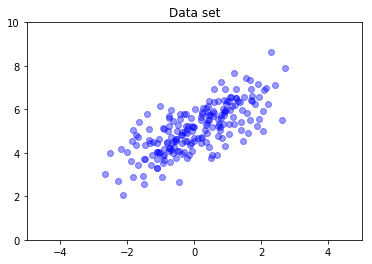

In [15]:
nd = tfd.MultivariateNormalFullCovariance(
    loc = [0., 5], covariance_matrix = [[1., .7], [.7, 1.]])
data = nd.sample(200)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

## Multiple Distributions

In [16]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
b3

<tfp.distributions.Bernoulli 'Bernoulli/' batch_shape=(3,) event_shape=() dtype=int32>

In [17]:
b3.sample()

<tf.Tensor: id=516, shape=(3,), dtype=int32, numpy=array([0, 1, 1], dtype=int32)>

In [18]:
b3.sample(6)

<tf.Tensor: id=541, shape=(6, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1]], dtype=int32)>

In [19]:
b3.prob([1, 1, 0])

<tf.Tensor: id=558, shape=(3,), dtype=float32, numpy=array([ 0.29999998,  0.5       ,  0.29999998], dtype=float32)>